# Import Libraries

In [184]:
import os
import seaborn as sns
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.interpolate import griddata

from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import pickle as pkl

In [68]:
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [69]:
curr_dir = (os.getcwd()).replace('\\', '/')
data_path = (os.path.join(curr_dir, 'Data')).replace('\\', '/')

## Stream Sediment Data

In [70]:
str_sed_data = pd.read_csv(data_path + '/stream_sediments_57F11.csv')

In [71]:
str_sed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 71 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gid        203 non-null    int64  
 1   objectid   203 non-null    int64  
 2   sampleno   203 non-null    object 
 3   longitude  203 non-null    float64
 4   latitude   203 non-null    float64
 5   sio2       203 non-null    float64
 6   al2o3      203 non-null    float64
 7   fe2o3      203 non-null    float64
 8   tio2       203 non-null    float64
 9   cao        203 non-null    float64
 10  mgo        203 non-null    float64
 11  mno        203 non-null    float64
 12  na2o       203 non-null    float64
 13  k2o        203 non-null    float64
 14  p2o5       203 non-null    float64
 15  loi        203 non-null    float64
 16  ba         203 non-null    float64
 17  ga         203 non-null    float64
 18  sc         203 non-null    float64
 19  v          203 non-null    float64
 20  th        

In [72]:
str_sed_data.describe()

,gid,objectid,longitude,latitude,sio2,al2o3,fe2o3,tio2,cao,mgo,...,w,u,pt,pd,in_,f,te,tl,hg,cd
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,...,203.0,203.000000,203.0,203.0,203.0,203.0,203.0,203.0,203.000000,203.000000
mean,3886.817734,3886.817734,77.625159,14.374757,61.577385,15.343576,5.106995,0.072808,1.711232,3.511527,...,2.5,2.898556,0.0,0.0,0.0,0.0,0.0,0.0,8.507389,51.556650
std,392.690039,392.690039,0.077262,0.073240,4.585337,1.115737,1.852035,0.037739,0.781060,1.287493,...,0.0,1.197724,0.0,0.0,0.0,0.0,0.0,0.0,9.023413,9.966801
min,2947.000000,2947.000000,77.500000,14.259009,44.100000,12.090000,2.460000,0.030000,0.580000,1.270000,...,2.5,0.507633,0.0,0.0,0.0,0.0,0.0,0.0,2.500000,50.000000
25%,3705.500000,3705.500000,77.564815,14.313063,59.146000,14.625000,3.975000,0.050000,1.200000,2.630000,...,2.5,2.125364,0.0,0.0,0.0,0.0,0.0,0.0,5.000000,50.000000
50%,3934.000000,3934.000000,77.620370,14.367117,62.750000,15.360000,4.650000,0.060000,1.520000,3.210000,...,2.5,2.646843,0.0,0.0,0.0,0.0,0.0,0.0,7.000000,50.000000
75%,4160.500000,4160.500000,77.694444,14.439189,64.325000,16.120000,5.525000,0.070000,1.965000,4.040000,...,2.5,3.588826,0.0,0.0,0.0,0.0,0.0,0.0,9.000000,50.000000
max,5073.000000,5073.000000,77.749999,14.493242,69.860000,17.970000,12.250000,0.230000,5.720000,8.380000,...,2.5,7.094000,0.0,0.0,0.0,0.0,0.0,0.0,80.000000,128.000000


Max and Min:
- Longitude
- Latitude

In [73]:
sed_max_long = max(str_sed_data['longitude'])
sed_min_long = min(str_sed_data['longitude'])

sed_max_lat = max(str_sed_data['latitude'])
sed_min_lat = min(str_sed_data['latitude'])

print("Stream Sediment coordinates - ")

print(f"Maximum longitude co-ordinate: {sed_max_long}")
print(f"Minimum longitude co-ordinate: {sed_min_long}")

print(f"Maximum latitude co-ordinate: {sed_max_lat}")
print(f"Minimum latitude co-ordinate: {sed_min_lat}")

Stream Sediment coordinates - 
Maximum longitude co-ordinate: 77.749999
Minimum longitude co-ordinate: 77.5
Maximum latitude co-ordinate: 14.493242
Minimum latitude co-ordinate: 14.259009


In [74]:
str_sed_data.head()

,gid,objectid,sampleno,longitude,latitude,sio2,al2o3,fe2o3,tio2,cao,...,u,pt,pd,toposheet,in_,f,te,tl,hg,cd
0,2947,2947,57F11/177/SS/12,77.657407,14.475225,61.921,14.606,4.51,0.05,2.28,...,3.016905,0,0,57F11,0,0,0,0,8.0,50
1,2948,2948,57F11/178/SS/12,77.675926,14.475225,62.077,13.750,4.22,0.05,2.43,...,3.378550,0,0,57F11,0,0,0,0,9.0,50
2,2949,2949,57F11/179/SS/12,77.694444,14.475225,68.645,13.410,3.02,0.05,1.32,...,3.509000,0,0,57F11,0,0,0,0,2.5,50
3,2950,2950,57F11/180/SS/12,77.712963,14.475225,64.950,14.280,3.46,0.05,1.75,...,4.241000,0,0,57F11,0,0,0,0,19.0,50
4,2951,2951,57F11/181/SS/12,77.731481,14.475225,64.302,14.010,4.08,0.05,1.84,...,4.218000,0,0,57F11,0,0,0,0,19.0,50


In [75]:
str_sed_data['toposheet'].value_counts()

toposheet
57F11    196
57F07      7
Name: count, dtype: int64

## Gravity Data

In [80]:
gravity_data = pd.read_csv(data_path + '/gravity_57F11.csv')

In [81]:
gravity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gid         363 non-null    int64  
 1   objectid    363 non-null    int64  
 2   longitude_  363 non-null    float64
 3   latitude_r  363 non-null    float64
 4   elevation_  363 non-null    int64  
 5   observed_g  363 non-null    int64  
 6   theoretica  363 non-null    int64  
 7   bouguer_an  363 non-null    int64  
 8   toposheet   363 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 25.6+ KB


In [82]:
gravity_data.head()

,gid,objectid,longitude_,latitude_r,elevation_,observed_g,theoretica,bouguer_an,toposheet
0,386966,386966,77.6264,14.2569,443,978167,978345,-91,57F/11
1,386967,386967,77.6278,14.2653,438,978168,978346,-91,57F/11
2,386968,386968,77.6281,14.2750,434,978170,978346,-90,57F/11
3,386969,386969,77.6292,14.2839,429,978170,978347,-91,57F/11
4,386970,386970,77.6286,14.2931,421,978173,978347,-90,57F/11


In [83]:
grav_max_long = max(gravity_data['longitude_'])
grav_min_long = min(gravity_data['longitude_'])

grav_max_lat = max(gravity_data['latitude_r'])
grav_min_lat = min(gravity_data['latitude_r'])

print("Gravity coordinates - ")

print(f"Maximum longitude co-ordinate: {grav_max_long}")
print(f"Minimum longitude co-ordinate: {grav_min_long}")

print(f"Maximum latitude co-ordinate: {grav_max_lat}")
print(f"Minimum latitude co-ordinate: {grav_min_lat}")

Gravity coordinates - 
Maximum longitude co-ordinate: 77.7489
Minimum longitude co-ordinate: 77.5006
Maximum latitude co-ordinate: 14.5
Minimum latitude co-ordinate: 14.2514


## Magnetic Data

In [84]:
magnetic_data = pd.read_csv(data_path + '/magnetic_57F11.csv')

In [85]:
magnetic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gid         337 non-null    int64  
 1   objectid    337 non-null    int64  
 2   observed_m  337 non-null    float64
 3   igrf_nt     337 non-null    float64
 4   magnetic_a  337 non-null    float64
 5   longitude_  337 non-null    float64
 6   latitude_r  337 non-null    float64
 7   toposheet   337 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 21.2+ KB


In [86]:
magnetic_data.head()

,gid,objectid,observed_m,igrf_nt,magnetic_a,longitude_,latitude_r,toposheet
0,317368,317368,40872.13132,41573.71077,-701.579447,77.66925,14.30908,57F/11
1,317369,317369,41135.13264,41629.78027,-494.647631,77.65450,14.49714,57F/11
2,317370,317370,41152.13245,41621.69501,-469.562560,77.66114,14.46881,57F/11
3,317371,317371,41165.13195,41604.09323,-438.961281,77.54458,14.44861,57F/11
4,317372,317372,41203.13215,41609.26900,-406.136845,77.65169,14.43136,57F/11


In [87]:
mag_max_long = max(magnetic_data['longitude_'])
mag_min_long = min(magnetic_data['longitude_'])

mag_max_lat = max(magnetic_data['latitude_r'])
mag_min_lat = min(magnetic_data['latitude_r'])

print("Magnetic coordinates - ")

print(f"Maximum longitude co-ordinate: {mag_max_long}")
print(f"Minimum longitude co-ordinate: {mag_min_long}")

print(f"Maximum latitude co-ordinate: {mag_max_lat}")
print(f"Minimum latitude co-ordinate: {mag_min_lat}")

Magnetic coordinates - 
Maximum longitude co-ordinate: 77.74933
Minimum longitude co-ordinate: 77.50089
Maximum latitude co-ordinate: 14.49911
Minimum latitude co-ordinate: 14.25006


## Interpolation of Gravity and Magnetic anomalies at Sediment locations

In [88]:
grav_lat = gravity_data['latitude_r']
grav_long = gravity_data['longitude_']
grav_elevation = gravity_data['elevation_']
grav_bg_an = gravity_data['bouguer_an']

mag_lat = magnetic_data['latitude_r']
mag_long = magnetic_data['longitude_']
mag_an = magnetic_data['magnetic_a']

sed_lat = str_sed_data['latitude']
sed_long = str_sed_data['longitude']
sed_composition = elements_df

In [89]:
elevation_interpolated = griddata((grav_lat, grav_long), grav_elevation, (sed_lat, sed_long), method='linear')
bouger_anomaly_interpolated = griddata((grav_lat, grav_long), grav_bg_an, (sed_lat, sed_long), method='linear')
magnetic_anomaly_interpolated = griddata((mag_lat, mag_long), mag_an, (sed_lat, sed_long), method='linear')

In [90]:
str_sed_data['interpolated_elevation'] = elevation_interpolated
str_sed_data['interpolated_bouger_anomaly'] = bouger_anomaly_interpolated
str_sed_data['interpolated_magnetic_anomaly'] = magnetic_anomaly_interpolated

str_sed_data.head()

,gid,objectid,sampleno,longitude,latitude,sio2,al2o3,fe2o3,tio2,cao,...,toposheet,in_,f,te,tl,hg,cd,interpolated_elevation,interpolated_bouger_anomaly,interpolated_magnetic_anomaly
0,2947,2947,57F11/177/SS/12,77.657407,14.475225,61.921,14.606,4.51,0.05,2.28,...,57F11,0,0,0,0,8.0,50,374.881622,-89.056606,60.049774
1,2948,2948,57F11/178/SS/12,77.675926,14.475225,62.077,13.750,4.22,0.05,2.43,...,57F11,0,0,0,0,9.0,50,369.412956,-89.795136,267.924225
2,2949,2949,57F11/179/SS/12,77.694444,14.475225,68.645,13.410,3.02,0.05,1.32,...,57F11,0,0,0,0,2.5,50,360.583097,-90.236797,3.797230
3,2950,2950,57F11/180/SS/12,77.712963,14.475225,64.950,14.280,3.46,0.05,1.75,...,57F11,0,0,0,0,19.0,50,355.814941,-90.000000,96.035242
4,2951,2951,57F11/181/SS/12,77.731481,14.475225,64.302,14.010,4.08,0.05,1.84,...,57F11,0,0,0,0,19.0,50,351.721784,-90.671204,192.970610


## PCA

In [92]:
str_sed_data.head()

,gid,objectid,sampleno,longitude,latitude,sio2,al2o3,fe2o3,tio2,cao,...,toposheet,in_,f,te,tl,hg,cd,interpolated_elevation,interpolated_bouger_anomaly,interpolated_magnetic_anomaly
0,2947,2947,57F11/177/SS/12,77.657407,14.475225,61.921,14.606,4.51,0.05,2.28,...,57F11,0,0,0,0,8.0,50,374.881622,-89.056606,60.049774
1,2948,2948,57F11/178/SS/12,77.675926,14.475225,62.077,13.750,4.22,0.05,2.43,...,57F11,0,0,0,0,9.0,50,369.412956,-89.795136,267.924225
2,2949,2949,57F11/179/SS/12,77.694444,14.475225,68.645,13.410,3.02,0.05,1.32,...,57F11,0,0,0,0,2.5,50,360.583097,-90.236797,3.797230
3,2950,2950,57F11/180/SS/12,77.712963,14.475225,64.950,14.280,3.46,0.05,1.75,...,57F11,0,0,0,0,19.0,50,355.814941,-90.000000,96.035242
4,2951,2951,57F11/181/SS/12,77.731481,14.475225,64.302,14.010,4.08,0.05,1.84,...,57F11,0,0,0,0,19.0,50,351.721784,-90.671204,192.970610


### Elements composition from different samples

In [107]:
rem_elem = []
for col in elements:
    if (str_sed_data[col] == 0).all():
        rem_elem.append(col)
print(f"Elements which don't contribute in the sediment composition: {rem_elem}")

Elements which don't contribute in the sediment composition: ['pt', 'pd', 'in_', 'f', 'te', 'tl']


In [108]:
str_sed_data.drop(elem_rem, axis=1, inplace=True)

In [109]:
str_sed_data.head()

,gid,objectid,sampleno,longitude,latitude,sio2,al2o3,fe2o3,tio2,cao,...,hf,ta,w,u,toposheet,hg,cd,interpolated_elevation,interpolated_bouger_anomaly,interpolated_magnetic_anomaly
0,2947,2947,57F11/177/SS/12,77.657407,14.475225,61.921,14.606,4.51,0.05,2.28,...,26.874492,0.677483,2.5,3.016905,57F11,8.0,50,374.881622,-89.056606,60.049774
1,2948,2948,57F11/178/SS/12,77.675926,14.475225,62.077,13.750,4.22,0.05,2.43,...,37.079419,0.774466,2.5,3.378550,57F11,9.0,50,369.412956,-89.795136,267.924225
2,2949,2949,57F11/179/SS/12,77.694444,14.475225,68.645,13.410,3.02,0.05,1.32,...,23.652000,0.715000,2.5,3.509000,57F11,2.5,50,360.583097,-90.236797,3.797230
3,2950,2950,57F11/180/SS/12,77.712963,14.475225,64.950,14.280,3.46,0.05,1.75,...,21.961000,0.744000,2.5,4.241000,57F11,19.0,50,355.814941,-90.000000,96.035242
4,2951,2951,57F11/181/SS/12,77.731481,14.475225,64.302,14.010,4.08,0.05,1.84,...,26.705000,0.832000,2.5,4.218000,57F11,19.0,50,351.721784,-90.671204,192.970610


In [111]:
str_elem = []

for col in list(str_sed_data.columns):
    if col not in ['gid', 
                   'objectid', 
                   'sampleno', 
                   'longitude', 
                   'latitude', 
                   'toposheet', 
                   'interpolated_elevation', 
                   'interpolated_bouger_anomaly', 
                   'interpolated_magnetic_anomaly']:
        str_elem.append(col)

str_elem

['sio2',
 'al2o3',
 'fe2o3',
 'tio2',
 'cao',
 'mgo',
 'mno',
 'na2o',
 'k2o',
 'p2o5',
 'loi',
 'ba',
 'ga',
 'sc',
 'v',
 'th',
 'pb',
 'ni',
 'co',
 'rb',
 'sr',
 'y',
 'zr',
 'nb',
 'cr',
 'cu',
 'zn',
 'au',
 'li',
 'cs',
 'as_',
 'sb',
 'bi',
 'se',
 'ag',
 'be',
 'ge',
 'mo',
 'sn',
 'la',
 'ce',
 'pr',
 'nd',
 'sm',
 'eu',
 'tb',
 'gd',
 'dy',
 'ho',
 'er',
 'tm',
 'yb',
 'lu',
 'hf',
 'ta',
 'w',
 'u',
 'hg',
 'cd']

### Normalize values

In [112]:
common_columns = str_sed_data.columns.intersection(['longitude', 
                                                    'latitude', 
                                                    'interpolated_elevation', 
                                                    'interpolated_bouger_anomaly', 
                                                    'interpolated_magnetic_anomaly'] + str_elem)
common_column_indices = [str_sed_data.columns.get_loc(col) for col in common_columns]

ct = ColumnTransformer(
    [('sc', 
      StandardScaler(), 
      common_column_indices)],
    remainder='drop'
)

norm_str_sed_data = ct.fit_transform(str_sed_data)

non_scaled_cols = str_sed_data.columns.difference(common_columns)

norm_str_sed_data_scaled = pd.DataFrame(norm_str_sed_data, 
                                        index=str_sed_data.index, 
                                        columns=common_columns)
norm_str_sed_data = pd.concat([str_sed_data[non_scaled_cols], 
                               norm_str_sed_data_scaled], 
                              axis=1)
norm_str_sed_data.head()

,gid,objectid,sampleno,toposheet,longitude,latitude,sio2,al2o3,fe2o3,tio2,...,lu,hf,ta,w,u,hg,cd,interpolated_elevation,interpolated_bouger_anomaly,interpolated_magnetic_anomaly
0,2947,2947,57F11/177/SS/12,57F11,0.418412,1.375144,0.075123,-0.662701,-0.323142,-0.605848,...,-0.144761,0.582180,-0.226398,0.0,0.099056,-0.056369,-0.15657,-1.069773,-0.387250,0.043511
1,2948,2948,57F11/178/SS/12,57F11,0.658696,1.375144,0.109229,-1.431804,-0.480114,-0.605848,...,0.743798,1.594826,-0.102134,0.0,0.401746,0.054727,-0.15657,-1.201039,-0.547184,1.990064
2,2949,2949,57F11/179/SS/12,57F11,0.898968,1.375144,1.545162,-1.737289,-1.129652,-0.605848,...,-0.049094,0.262408,-0.178327,0.0,0.510930,-0.667402,-0.15657,-1.412985,-0.642829,-0.483242
3,2950,2950,57F11/180/SS/12,57F11,1.139252,1.375144,0.737340,-0.955607,-0.891488,-0.605848,...,-0.285613,0.094608,-0.141170,0.0,1.123600,1.165695,-0.15657,-1.527436,-0.591549,0.380482
4,2951,2951,57F11/181/SS/12,57F11,1.379523,1.375144,0.595671,-1.198198,-0.555893,-0.605848,...,0.033173,0.565361,-0.028416,0.0,1.104350,1.165695,-0.15657,-1.625685,-0.736903,1.288192


In [114]:
norm_str_elem_df = norm_str_sed_data[str_elem]
norm_str_elem_df.head()

,sio2,al2o3,fe2o3,tio2,cao,mgo,mno,na2o,k2o,p2o5,...,er,tm,yb,lu,hf,ta,w,u,hg,cd
0,0.075123,-0.662701,-0.323142,-0.605848,0.730001,-0.211417,-1.330500,0.060706,-0.639785,0.223826,...,-0.126079,-0.161437,-0.364197,-0.144761,0.582180,-0.226398,0.0,0.099056,-0.056369,-0.15657
1,0.109229,-1.431804,-0.480114,-0.605848,0.922523,0.489344,-1.330500,0.205686,-0.507348,-0.004499,...,0.404513,0.539549,0.719272,0.743798,1.594826,-0.102134,0.0,0.401746,0.054727,-0.15657
2,1.545162,-1.737289,-1.129652,-0.605848,-0.502137,-0.250348,1.552665,1.059459,-0.021747,-0.917801,...,-0.565681,-0.524287,-0.305103,-0.049094,0.262408,-0.178327,0.0,0.510930,-0.667402,-0.15657
3,0.737340,-0.955607,-0.891488,-0.605848,0.049758,-0.320425,0.395190,0.640627,-0.683931,-0.004499,...,-0.501868,-0.795759,-0.552125,-0.285613,0.094608,-0.141170,0.0,1.123600,1.165695,-0.15657
4,0.595671,-1.198198,-0.555893,-0.605848,0.165271,-0.211417,-0.067800,0.656736,-0.021747,0.908803,...,-0.320400,-0.465272,-0.306906,0.033173,0.565361,-0.028416,0.0,1.104350,1.165695,-0.15657


In [115]:
pca = PCA(n_components=10)
pca.fit(norm_str_elem_df)

PCA(n_components=10)

In [119]:
total_variance = sum(pca.explained_variance_)
desired_variance = 0.75
cumulative_variance = 0
num_comp = 0

for explained_variance_ in pca.explained_variance_:
    cumulative_variance += explained_variance_
    if cumulative_variance / total_variance >= desired_variance:
        break
    num_comp += 1

print(f"Number of components to explain atleast {desired_variance*100}% of variance: {num_comp}")

Number of components to explain atleast 75.0% of variance: 3


In [120]:
pca.explained_variance_ratio_

array([0.3169328 , 0.20085431, 0.07371866, 0.04642814, 0.03908367,
       0.03253563, 0.03044845, 0.02761462, 0.02243755, 0.02047   ])

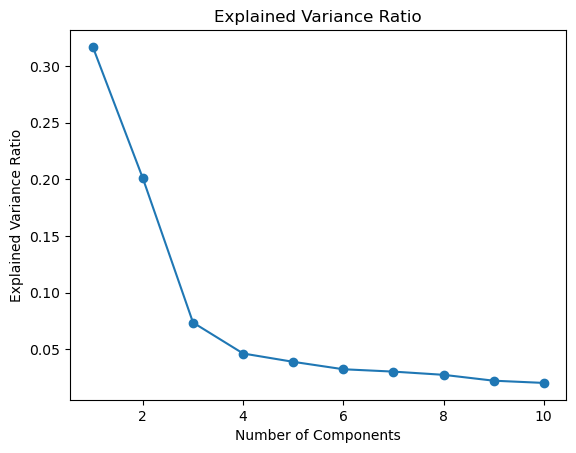

In [118]:
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_, 
         marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio')
plt.show()

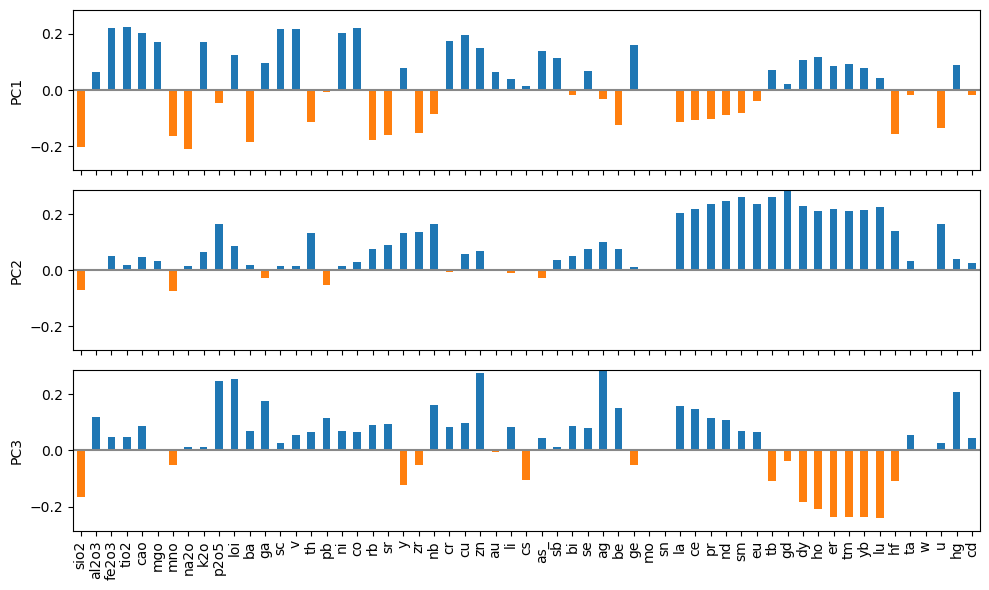

In [122]:
loadings = pca.components_
num_com_to_plot = 3
loadings_to_plot = loadings[:num_com_to_plot]
loadings_df = pd.DataFrame(loadings_to_plot, 
                           columns=str_elem)

# Calculate the maximum absolute value for setting y-axis limits
max_pc = 1.01 * np.max(np.abs(loadings_to_plot))

# Plot loadings for each principal component
fig, axes = plt.subplots(num_com_to_plot, 
                         1, 
                         figsize=(10, 6), 
                         sharex=True)

for i, ax in enumerate(axes):
    pc_loadings = loadings_df.iloc[i]
    colors = ['C0' if l > 0 else 'C1' for l in pc_loadings]
    ax.axhline(color='#888888')
    pc_loadings.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'PC{i+1}')
    ax.set_ylim(-max_pc, max_pc)

plt.tight_layout()
plt.show()

In [123]:
sc = StandardScaler()
norm_str_sed_data['gid'] = sc.fit_transform(norm_str_sed_data[['gid']])
norm_str_sed_data.head()

,gid,objectid,sampleno,toposheet,longitude,latitude,sio2,al2o3,fe2o3,tio2,...,lu,hf,ta,w,u,hg,cd,interpolated_elevation,interpolated_bouger_anomaly,interpolated_magnetic_anomaly
0,-2.399198,2947,57F11/177/SS/12,57F11,0.418412,1.375144,0.075123,-0.662701,-0.323142,-0.605848,...,-0.144761,0.582180,-0.226398,0.0,0.099056,-0.056369,-0.15657,-1.069773,-0.387250,0.043511
1,-2.396645,2948,57F11/178/SS/12,57F11,0.658696,1.375144,0.109229,-1.431804,-0.480114,-0.605848,...,0.743798,1.594826,-0.102134,0.0,0.401746,0.054727,-0.15657,-1.201039,-0.547184,1.990064
2,-2.394092,2949,57F11/179/SS/12,57F11,0.898968,1.375144,1.545162,-1.737289,-1.129652,-0.605848,...,-0.049094,0.262408,-0.178327,0.0,0.510930,-0.667402,-0.15657,-1.412985,-0.642829,-0.483242
3,-2.391539,2950,57F11/180/SS/12,57F11,1.139252,1.375144,0.737340,-0.955607,-0.891488,-0.605848,...,-0.285613,0.094608,-0.141170,0.0,1.123600,1.165695,-0.15657,-1.527436,-0.591549,0.380482
4,-2.388987,2951,57F11/181/SS/12,57F11,1.379523,1.375144,0.595671,-1.198198,-0.555893,-0.605848,...,0.033173,0.565361,-0.028416,0.0,1.104350,1.165695,-0.15657,-1.625685,-0.736903,1.288192


### Fit and Transform using PCA on elements

In [125]:
pca = PCA(n_components=3)
pca_elem = pca.fit_transform(norm_str_elem_df)

In [127]:
pca_str_sed_df = pd.concat([norm_str_sed_data[['gid', 'longitude', 'latitude', 'interpolated_elevation', 
                                               'interpolated_bouger_anomaly', 'interpolated_magnetic_anomaly']], 
                        pd.DataFrame(pca_elem, columns=['PC1', 'PC2', 'PC3'])], 
                       axis=1)
pca_str_sed_df.head()

,gid,longitude,latitude,interpolated_elevation,interpolated_bouger_anomaly,interpolated_magnetic_anomaly,PC1,PC2,PC3
0,-2.399198,0.418412,1.375144,-1.069773,-0.387250,0.043511,-1.695228,1.993939,0.148456
1,-2.396645,0.658696,1.375144,-1.201039,-0.547184,1.990064,-1.756757,2.727682,-1.433907
2,-2.394092,0.898968,1.375144,-1.412985,-0.642829,-0.483242,-4.221992,-1.376711,-1.902897
3,-2.391539,1.139252,1.375144,-1.527436,-0.591549,0.380482,-3.560825,-0.644565,-0.148021
4,-2.388987,1.379523,1.375144,-1.625685,-0.736903,1.288192,-2.972327,0.671393,0.373376


# KMeans Clustering

## Finding the right k

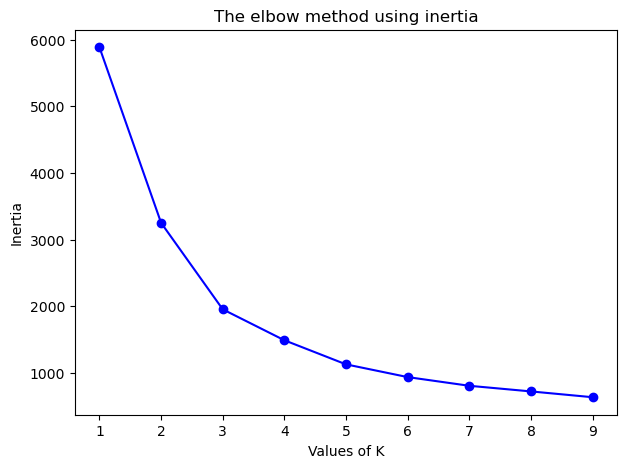

In [131]:
inertia = []                                     ## Sum-of-squared distances
for k in range(1, 10):
    km = KMeans(
        n_clusters=k, init='random',
        n_init=10, max_iter=300, 
        tol=1e-03, random_state=0
    )
    km.fit_predict(pca_str_sed_df[['PC1', 'PC2']])
    inertia.append(km.inertia_)

plt.figure(figsize=(7,5))
plt.plot(range(1, 10), 
         inertia, 
         'bo-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The elbow method using inertia')
plt.show()

In [132]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-03, random_state=0
)
y_km = km.fit_predict(pca_str_sed_df[['PC1', 'PC2', 'PC3']])

In [133]:
clustered_data = pd.concat([str_sed_data[['gid', 'longitude', 'latitude']], 
                            pd.DataFrame(y_km, columns=['clusters'])], 
                           axis=1)

In [135]:
clustered_data.head()

,gid,longitude,latitude,clusters
0,2947,77.657407,14.475225,2
1,2948,77.675926,14.475225,2
2,2949,77.694444,14.475225,1
3,2950,77.712963,14.475225,1
4,2951,77.731481,14.475225,2


In [134]:
min_lat_limit = sed_min_lat - 0.05
max_lat_limit = sed_max_lat + 0.05
min_long_limit = sed_min_long - 0.05 
max_long_limit = sed_max_long + 0.05

print(f'Min latitude: {np.round(min_lat_limit, 4)}\tMax latitude: {np.round(max_lat_limit, 4)}')
print(f'Min longitude: {np.round(min_long_limit, 4)}\tMax longitude: {np.round(max_long_limit, 4)}')

Min latitude: 14.209	Max latitude: 14.5432
Min longitude: 77.45	Max longitude: 77.8


## Plot based on each cluster

In [156]:
# Create a list to store individual figure objects
fig_list = []

# Loop through each cluster
for cluster_id in clustered_data['clusters'].unique():
    # Filter data for the current cluster
    cluster_data = clustered_data[clustered_data['clusters'] == cluster_id]

    hover_text = [f'Sediment ID: {gid}<br>Latitude: {lat}<br>Longitude: {lon}' 
                  for gid, lat, lon in zip(cluster_data['gid'], 
                                           cluster_data['latitude'], 
                                           cluster_data['longitude'])]
    
    # Create a scatter mapbox trace
    trace = go.Scattermapbox(
        lat=cluster_data['latitude'],
        lon=cluster_data['longitude'],
        mode='markers',
        marker=dict(
            size=10,
            color='blue',  # You can assign different colors for each cluster
            opacity=0.8
        ),
        text=hover_text,  # Text to be displayed on hover
        hoverinfo='text'  # Display bore hole id, latitude and longitude text on hover
    )
    
    # Create layout for the map
    layout = go.Layout(
        title=f'Cluster {cluster_id+1}',
        hovermode='closest',
        mapbox=dict(
            style='open-street-map',  # You can choose different map styles
            center=dict(
                lat=cluster_data['latitude'].mean(),  # Set the map center to the mean of latitudes
                lon=cluster_data['longitude'].mean()  # Set the map center to the mean of longitudes
            ),
            zoom=10, 
            bounds=dict(
                south=min_lat_limit,
                north=max_lat_limit,
                west=min_long_limit,
                east=max_long_limit
            )
        )
    )
    
    # Create figure object and add trace and layout
    fig = go.Figure(data=trace, layout=layout)

    fig.update_layout(
        autosize=False,
        width=700,
        height=700,
    )
    
    # Append the figure to the list
    fig_list.append(fig)

# Display each figure
for fig in fig_list:
    fig.show(renderer='browser')

## Plot combining all clusters

In [154]:
# Create text to display on hover with gid, latitude, and longitude
hover_text = [f'Latitude: {lat}<br>Longitude: {lon}<br>Sediment ID: {gid}' 
              for lat, lon, gid in zip(clustered_data['latitude'], 
                                       clustered_data['longitude'], 
                                       clustered_data['gid'])]

colors = ['#FC2E20', '#A45C40', '#211522']

# Create a scatter mapbox trace
trace = go.Scattermapbox(
    lat=clustered_data['latitude'],
    lon=clustered_data['longitude'],
    mode='markers',
    marker=dict(
        size=10,
        color=[colors[c] for c in clustered_data['clusters']],  # You can assign different colors for each cluster
        opacity=0.8
    ),
    text=hover_text,  # Text to be displayed on hover
    hoverinfo='text'  # Display only the text on hover
)

# Create layout for the map
layout = go.Layout(
    title=f'Sediment Clusters',
    hovermode='closest',
    mapbox=dict(
        style='open-street-map',  # You can choose different map styles
        center=dict(
            lat=cluster_data['latitude'].mean(),  # Set the map center to the mean of latitudes
            lon=cluster_data['longitude'].mean()  # Set the map center to the mean of longitudes
        ),
        zoom=10, 
        bounds=dict(
            south=min_lat_limit,
            north=max_lat_limit,
            west=min_long_limit,
            east=max_long_limit
        )
    )
)

# Create figure object and add trace and layout
fig = go.Figure(data=trace, layout=layout)

fig.update_layout(
    autosize=False,
    width=700,
    height=700,
)

# Display the figure
fig.show(renderer='browser')


In [158]:
str_sed_data['cluster'] = clustered_data['clusters']
str_sed_data.head()

,gid,objectid,sampleno,longitude,latitude,sio2,al2o3,fe2o3,tio2,cao,...,ta,w,u,toposheet,hg,cd,interpolated_elevation,interpolated_bouger_anomaly,interpolated_magnetic_anomaly,cluster
0,2947,2947,57F11/177/SS/12,77.657407,14.475225,61.921,14.606,4.51,0.05,2.28,...,0.677483,2.5,3.016905,57F11,8.0,50,374.881622,-89.056606,60.049774,2
1,2948,2948,57F11/178/SS/12,77.675926,14.475225,62.077,13.750,4.22,0.05,2.43,...,0.774466,2.5,3.378550,57F11,9.0,50,369.412956,-89.795136,267.924225,2
2,2949,2949,57F11/179/SS/12,77.694444,14.475225,68.645,13.410,3.02,0.05,1.32,...,0.715000,2.5,3.509000,57F11,2.5,50,360.583097,-90.236797,3.797230,1
3,2950,2950,57F11/180/SS/12,77.712963,14.475225,64.950,14.280,3.46,0.05,1.75,...,0.744000,2.5,4.241000,57F11,19.0,50,355.814941,-90.000000,96.035242,1
4,2951,2951,57F11/181/SS/12,77.731481,14.475225,64.302,14.010,4.08,0.05,1.84,...,0.832000,2.5,4.218000,57F11,19.0,50,351.721784,-90.671204,192.970610,2


## Plotting clusters based on latitude and longitude

In [165]:
cluster_mean = str_sed_data.groupby('cluster')[str_elem].mean()
cluster_mean

,sio2,al2o3,fe2o3,tio2,cao,mgo,mno,na2o,k2o,p2o5,...,er,tm,yb,lu,hf,ta,w,u,hg,cd
cluster,,,,,,,,,,,,,,,,,,,,,
0,52.110818,15.963409,9.451364,0.167273,3.355909,5.805000,1.386818,1.150455,1.184545,0.095000,...,2.596489,0.456448,3.014570,0.484235,7.098007,0.670740,2.5,1.495547,16.772727,50.000000
1,63.374743,15.293648,4.474028,0.061389,1.448704,3.195741,2.316759,2.468519,0.683889,0.100648,...,2.013041,0.339604,2.257229,0.384794,18.640085,0.853549,2.5,2.551685,6.356481,50.685185
2,61.771219,15.230644,4.734178,0.061233,1.603973,3.287534,2.139452,2.737260,0.730548,0.156712,...,2.364531,0.398426,2.682433,0.474346,28.702119,0.910390,2.5,3.834558,9.198630,53.315068


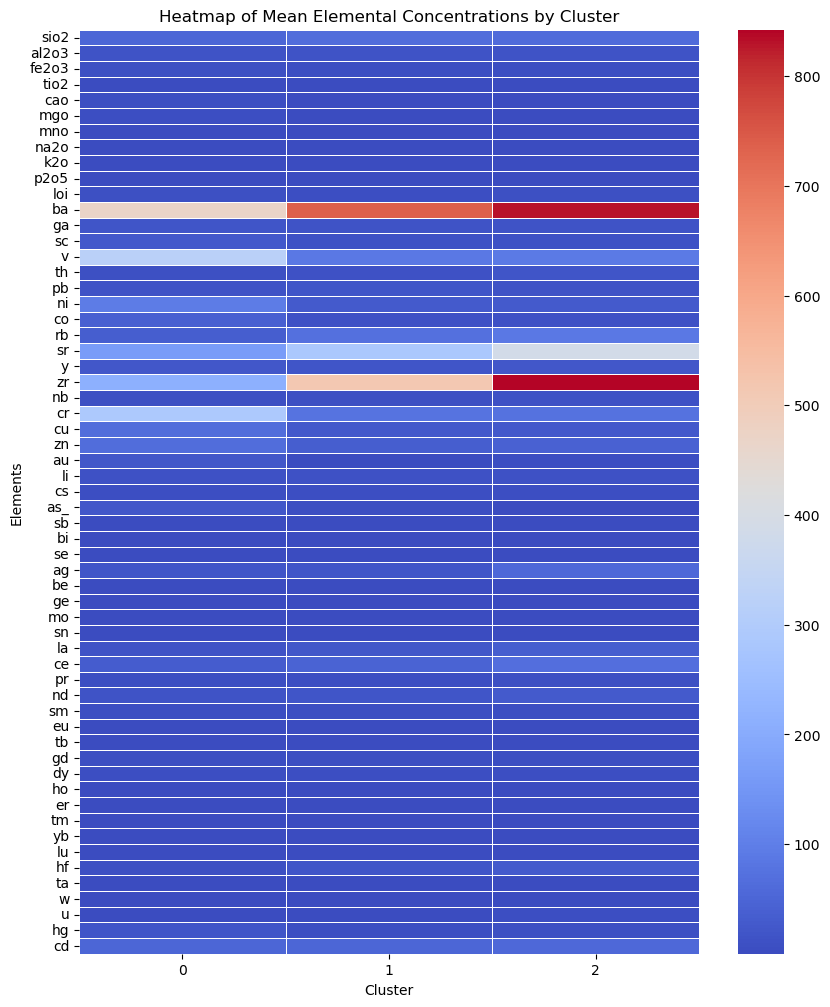

In [177]:
plt.figure(figsize=(10, 12))
heatmap = sns.heatmap(cluster_mean.T, 
                      annot=False, 
                      cmap='coolwarm', 
                      linewidths=.5)
heatmap.set_title('Heatmap of Mean Elemental Concentrations by Cluster')
heatmap.set_xlabel('Cluster')
heatmap.set_ylabel('Elements')
plt.show()

## Saving the models

In [191]:
model_path = (os.path.join(curr_dir, 'Models/')).replace('\\', '/')

In [192]:
with open(model_path + 'column_tranbsformer.pkl', 'wb') as file:
    pkl.dump(ct, file)

with open(model_path + 'pca.pkl', 'wb') as file:
    pkl.dump(pca, file)

with open(model_path + 'kmeans.pkl', 'wb') as file:
    pkl.dump(km, file)